In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
file = "Resources/COVID19_line_list_data.csv"

In [105]:
original_df = pd.read_csv(file)
original_df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/2020,...,01/11/2020,12/29/2019,01/04/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/2020,...,1/17/2020,NaN,01/03/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [106]:
# Set new index to last_name

In [108]:
# Loc and Iloc also allow for conditional statments to filter rows of data
# using Loc on the logic test above only returns rows where the result is True
only_china = original_df.loc[original_df["country"] == "China", :]
only_china.head()


,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/2020,...,01/11/2020,12/29/2019,01/04/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/2020,...,1/17/2020,NaN,01/03/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


Text(0, 0.5, 'Number of cases')

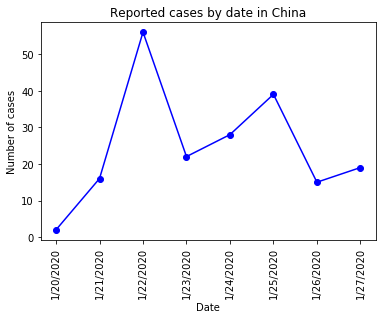

In [109]:
dates = only_china["reporting date"].unique()
x_axis = np.arange(0,len(only_china["reporting date"].unique()),1)

grouped_by_date_df = only_china.groupby(["reporting date"])
counts = grouped_by_date_df.count()
y_axis = counts["id"].to_list()
plt.plot(x_axis, y_axis, marker ='o', color='blue')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, dates, rotation="vertical")
#plt.figure(figsize=(40,10))
plt.title("Reported cases by date in China")
plt.xlabel("Date")
plt.ylabel("Number of cases")

In [110]:
# Create the bins in which Data will be held
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bins = [0, 9.9, 19.9,29.9,39.9, 49.9, 59.9, 69.9, 79.9,89.9,99.9]

# Create the names for the five bins
labels = ["<10", "<20", "<30","<40","<50","<60","<70","<80","<90","<100"]

# Slice the data and place it into bins
only_china["Age Group"] = pd.cut(only_china["age"],bins, labels= labels)

only_males = only_china.loc[only_china["gender"] == "male", :]
grouped_age_male = only_males.groupby(["Age Group"])


only_females = only_china.loc[only_china["gender"] == "female", :]
grouped_age_female = only_females.groupby(["Age Group"])
female_count = grouped_age_female["id"].count().tolist()
male_count = grouped_age_male["id"].count().tolist()
male_count, female_count

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


([0, 3, 10, 24, 26, 22, 14, 11, 8, 0], [3, 3, 8, 15, 10, 11, 13, 5, 4, 0])

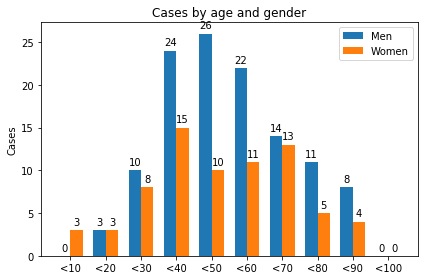

In [112]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Men')
rects2 = ax.bar(x + width/2, female_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Cases by age and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()